# Governo Eficaz COVID

## Descrição
Eficácia e eficiência no tratamento de COVID-19 por parte dos prefeitos e governadores.

Visualização dos dados de tratamento e morte por COVID-19 divulgados pelo governo correlacionado com cada prefeito e governador, e seus respectivos partidos, para demonstrar o quanto foi gasto na contenção da doença e sua taxa de sucesso (na região sudeste do Brasil e nas principais cidades do vale do paraiba) a fim de ajudar na decisão de um candidato nas eleições.

**Autores:** Bruna Gonçalves e Fábio Romeiro

### Importando dependencias

In [25]:
import pandas as pd
from functools import reduce

### Importando e estudando dados de candidatos a prefeitos

In [2]:
df_all_candidates = pd.read_csv('Dados/prefeitos2016a2020.csv', encoding='latin1')
df_all_candidates.head()

,ano_eleicao,sigla_uf,descricao_ue,num_turno,descricao_cargo,sigla_partido,descricao_sexo,cpf_candidato,data_nascimento,numero_candidato,nome_candidato,nome_urna_candidato,des_situacao_candidatura,desc_sit_tot_turno
0,2016,SP,EUCLIDES DA CUNHA PAULISTA,1,PREFEITO,PMDB,MASCULINO,***185628**,15/06/1963,15,ELIAS TOLOVI ROSA,ELIAS,DEFERIDO,NÃO ELEITO
1,2016,SP,EUCLIDES DA CUNHA PAULISTA,1,PREFEITO,PRB,MASCULINO,***628898**,22/11/1987,10,DOMINGOS MENTE LOPES,NÊNÊ LOPES,DEFERIDO,NÃO ELEITO
2,2016,SP,EUCLIDES DA CUNHA PAULISTA,1,PREFEITO,PSD,MASCULINO,***144678**,26/07/1976,55,CHRISTIAN FUZIKI IKEDA,DR CHRISTIAN,DEFERIDO,ELEITO
3,2016,SP,ADAMANTINA,1,PREFEITO,DEM,MASCULINO,***900438**,26/06/1963,25,MÁRCIO CARDIM,MÁRCIO CARDIM,DEFERIDO,ELEITO
4,2016,SP,ADAMANTINA,1,PREFEITO,PTB,MASCULINO,***548498**,06/03/1960,14,CICERO MORTARI,CICERO MORTARI,DEFERIDO,NÃO ELEITO


In [3]:
variable_types = pd.DataFrame(df_all_candidates.dtypes, columns=['Data type'])
variable_types.columns.name = 'Variable'
variable_types

Variable,Data type
ano_eleicao,int64
sigla_uf,object
descricao_ue,object
num_turno,int64
descricao_cargo,object
sigla_partido,object
descricao_sexo,object
cpf_candidato,object
data_nascimento,object
numero_candidato,int64


In [4]:
print('A base de dados apresenta {} registros (candidatos) e {} variáveis'.format(df_all_candidates.shape[0], df_all_candidates.shape[1]))

A base de dados apresenta 2077 registros (candidatos) e 14 variáveis


### Filtrando candidatos eleitos como prefeito por cidades escolhidas

In [5]:
chosen_cities = [
    'SÃO JOSÉ DOS CAMPOS',
    'TAUBATÉ',
    'JACAREÍ',
    'CAÇAPAVA',
    'PINDAMONHANGABA'
]

In [6]:
df_candidates = df_all_candidates.query('desc_sit_tot_turno  == "ELEITO" and descricao_ue in @chosen_cities')[['nome_candidato', 'sigla_partido', 'descricao_ue']]
df_candidates.index = range(df_candidates.shape[0])
df_candidates.columns = ['NOME_CANDIDATO', 'SIGLA_PARTIDO', 'CIDADE']
df_candidates

,NOME_CANDIDATO,SIGLA_PARTIDO,CIDADE
0,FERNANDO CID DINIZ BORGES,PV,CAÇAPAVA
1,IZAIAS JOSÉ DE SANTANA,PSDB,JACAREÍ
2,ISAEL DOMINGUES,PR,PINDAMONHANGABA
3,FELÍCIO RAMUTH,PSDB,SÃO JOSÉ DOS CAMPOS
4,JOSE BERNARDO ORTIZ MONTEIRO JUNIOR,PSDB,TAUBATÉ


### Importando e estudando dados de despesas dos municipios

In [7]:
df_gastos_municipios = pd.read_csv('Dados/DespesasPrincipaisMunicipiosRegiaoSudeste.csv', sep=",", encoding="ANSI")
df_gastos_municipios.head()

,AN_EXERCICIO,NR_PERIODO,IN_PERIODICIDADE,CO_ESFERA,CO_PODER,ID_ENTE,NO_ENTE,SG_ENTE,fase_despesa,funcao,VALUE,QT_HABITANTE,ELEMENTLABEL,DT_STATUS_COLETA,dh_consulta
0,2020,1,B,M,E,3524402,Jacareí,SP,DESPESAS EMPENHADAS NO BIMESTRE,Saúde,9.017802e+05,233662,Total de Despesas Intraorçamentária,2020-03-31T01:36:10Z,##------ Mon Nov 16 19:11:45 2020 ------##
1,2020,3,B,M,E,3549904,São José dos Campos,SP,DESPESAS EMPENHADAS NO BIMESTRE,Saúde,5.759774e+06,721944,Total de Despesas Intraorçamentária,2020-07-30T18:08:24Z,##------ Mon Nov 16 19:11:45 2020 ------##
2,2020,2,B,M,E,3549904,São José dos Campos,SP,DESPESAS EMPENHADAS NO BIMESTRE,Saúde,5.786305e+06,721944,Total de Despesas Intraorçamentária,2020-05-29T19:36:16Z,##------ Mon Nov 16 19:11:45 2020 ------##
3,2020,3,B,M,E,3524402,Jacareí,SP,DESPESAS EMPENHADAS NO BIMESTRE,Saúde,3.131959e+07,233662,Total das Despesas Exceto Intra-Orçamentárias,2020-07-31T01:34:18Z,##------ Mon Nov 16 19:11:45 2020 ------##
4,2020,2,B,M,E,3549904,São José dos Campos,SP,DESPESAS LIQUIDADAS NO BIMESTRE,Saúde,1.260204e+08,721944,Total das Despesas Exceto Intra-Orçamentárias,2020-05-29T19:36:16Z,##------ Mon Nov 16 19:11:45 2020 ------##


In [8]:
cities_expenses_series = df_gastos_municipios.groupby('NO_ENTE')['VALUE'].sum()
cities_expenses_series.index.name = 'CIDADE'
cities_expenses_series

CIDADE
Caçapava               9.542239e+07
Jacareí                3.721658e+08
Pindamonhangaba        2.640983e+08
São José dos Campos    1.161672e+09
Taubaté                5.176157e+08
Name: VALUE, dtype: float64

In [9]:
frame = { 'CIDADE': cities_expenses_series.index.values, 'GASTO': cities_expenses_series.values }
df_cities_expenses = pd.DataFrame(frame)
df_cities_expenses['CIDADE'] = df_cities_expenses['CIDADE'].str.upper()
df_cities_expenses

,CIDADE,GASTO
0,CAÇAPAVA,9.542239e+07
1,JACAREÍ,3.721658e+08
2,PINDAMONHANGABA,2.640983e+08
3,SÃO JOSÉ DOS CAMPOS,1.161672e+09
4,TAUBATÉ,5.176157e+08


### Importando e estudando dados de mortes por COVID dos municipios

### Concatenando informações no mesmo DataFrame

In [62]:
data_frames = [df_cities_expenses, df_candidates]
df_government_efficiency = reduce(lambda left, right: pd.merge(left, right, how='inner'), data_frames)
df_government_efficiency['NOME_CANDIDATO'] = df_government_efficiency['NOME_CANDIDATO'].str.title()
df_government_efficiency['CIDADE'] = df_government_efficiency['CIDADE'].str.title()
df_government_efficiency['CIDADE_GERAL'] = df_government_efficiency[['CIDADE', 'NOME_CANDIDATO', 'SIGLA_PARTIDO']].agg('\n'.join, axis=1)
df_government_efficiency

,CIDADE,GASTO,NOME_CANDIDATO,SIGLA_PARTIDO,CIDADE_GERAL
0,Caçapava,9.542239e+07,Fernando Cid Diniz Borges,PV,Caçapava\nFernando Cid Diniz Borges\nPV
1,Jacareí,3.721658e+08,Izaias José De Santana,PSDB,Jacareí\nIzaias José De Santana\nPSDB
2,Pindamonhangaba,2.640983e+08,Isael Domingues,PR,Pindamonhangaba\nIsael Domingues\nPR
3,São José Dos Campos,1.161672e+09,Felício Ramuth,PSDB,São José Dos Campos\nFelício Ramuth\nPSDB
4,Taubaté,5.176157e+08,Jose Bernardo Ortiz Monteiro Junior,PSDB,Taubaté\nJose Bernardo Ortiz Monteiro Junior\n...


<AxesSubplot:title={'center':'Comparação dos gastos de saúde das cidades do vale em 2020'}, xlabel='Cidade', ylabel='Gasto (R$ Bi)'>

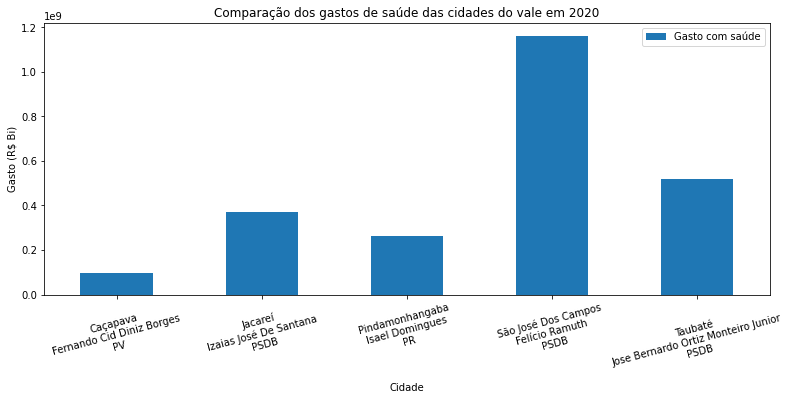

In [66]:
graph_government_efficiency = df_government_efficiency.plot.bar(
    x='CIDADE_GERAL', 
    y='GASTO', 
    rot=15, 
    title='Comparação dos gastos de saúde das cidades do vale em 2020', 
    xlabel='Cidade',
    ylabel='Gasto (R$ Bi)',
    figsize=(13, 5))
graph_government_efficiency.legend(['Gasto com saúde'])
graph_government_efficiency